In [110]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')


In [111]:
df = pd.read_excel('India_Final.xlsx')
df.tail()

,Sno,Country,Date,Atleast_1st_dose,Fully_vaccinated,New_deaths,Ratio
360,361,India,2022-02-09,954257234,740575198,1241,69.1
361,362,India,2022-02-10,954313669,740861221,657,69.2
362,363,India,2022-02-11,956363985,740888827,670,69.3
363,364,India,2022-02-12,957047881,750185166,684,69.4
364,365,India,2022-02-13,958033046,753481207,346,69.4


In [112]:
df.shape

(365, 7)

In [113]:
df.describe

<bound method NDFrame.describe of      Sno Country       Date  Atleast_1st_dose  Fully_vaccinated  New_deaths  \
0      1   India 2021-02-13           8044786              7668          92   
1      2   India 2021-02-14           8231720             52893          90   
2      3   India 2021-02-15           8418653             98118          81   
3      4   India 2021-02-16           8641002            216339         100   
4      5   India 2021-02-17           8844641            342116         101   
..   ...     ...        ...               ...               ...         ...   
360  361   India 2022-02-09         954257234         740575198        1241   
361  362   India 2022-02-10         954313669         740861221         657   
362  363   India 2022-02-11         956363985         740888827         670   
363  364   India 2022-02-12         957047881         750185166         684   
364  365   India 2022-02-13         958033046         753481207         346   

     Ratio  
0   

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sno               365 non-null    int64         
 1   Country           365 non-null    object        
 2   Date              365 non-null    datetime64[ns]
 3   Atleast_1st_dose  365 non-null    int64         
 4   Fully_vaccinated  365 non-null    int64         
 5   New_deaths        365 non-null    int64         
 6   Ratio             365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 20.1+ KB


In [115]:
df_corr = df.corr()
df_corr

,Sno,Atleast_1st_dose,Fully_vaccinated,New_deaths,Ratio
Sno,1.000000,0.991969,0.932710,-0.304481,0.991989
Atleast_1st_dose,0.991969,1.000000,0.933895,-0.370532,0.999976
Fully_vaccinated,0.932710,0.933895,1.000000,-0.304986,0.935622
New_deaths,-0.304481,-0.370532,-0.304986,1.000000,-0.368930
Ratio,0.991989,0.999976,0.935622,-0.368930,1.000000


<AxesSubplot:>

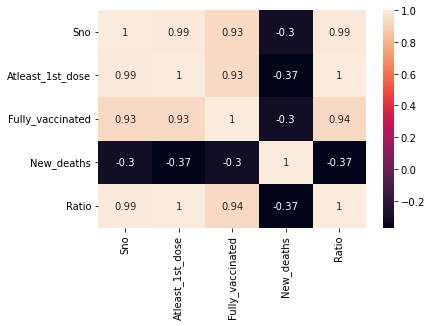

In [116]:
sns.heatmap(df.corr(), annot=True)

In [117]:
First_Dose= df['Atleast_1st_dose'].unique().sum()
First_Dose

165196169106

In [118]:
Fullyvaccinated = df['Fully_vaccinated'].unique().sum()
Fullyvaccinated

81297289414

In [119]:
Deaths = df['New_deaths'].unique().sum()
Deaths

330800

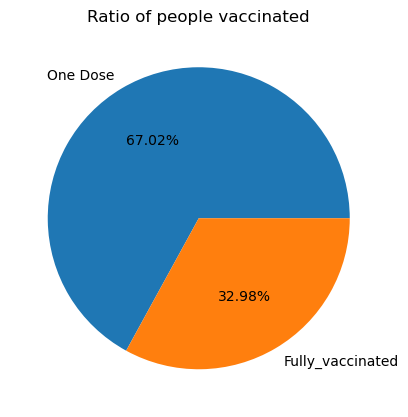

In [120]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [First_Dose,Fullyvaccinated],
    autopct='%.2F%%',
    labels=['One Dose','Fully_vaccinated'])
plt.title('Ratio of people vaccinated')
plt.show()

In [121]:
#number of people who got at least one shot of COVID vaccine
df_country_vac = df.groupby('Country').agg({'Atleast_1st_dose':max}).reset_index()
sum_vac = df_country_vac['Atleast_1st_dose'].sum()
df_country_rat = df.groupby('Country').agg({'Ratio':max}).reset_index()
df_country_deaths = df.groupby('Country').agg({'New_deaths':max}).reset_index()
# df_country_deaths
df_country_rat

,Country,Ratio
0,India,69.4


In [122]:
#Checking null values
df.isnull()

,Sno,Country,Date,Atleast_1st_dose,Fully_vaccinated,New_deaths,Ratio
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False


Text(0.5, 1.0, 'ratio vs New_deaths India')

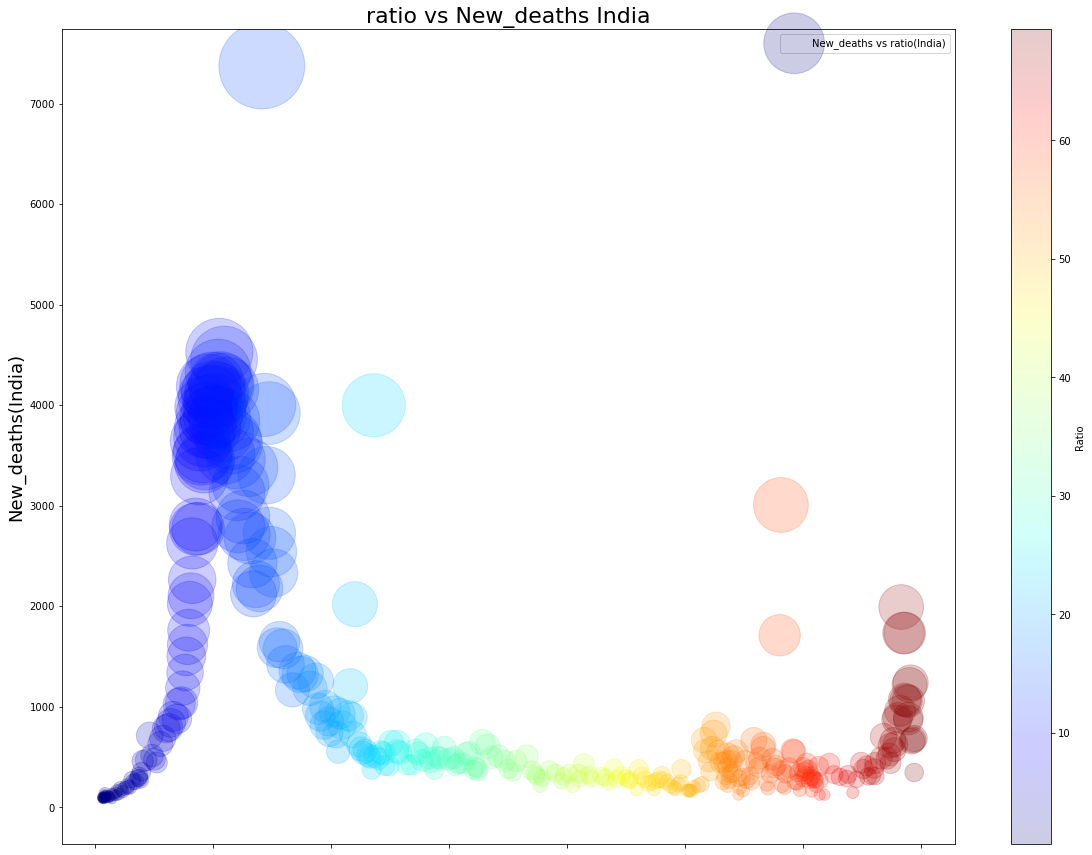

In [123]:
#Vaccination vs mortality graph


df_India= df
df_India.plot(
    kind='scatter',
    x='Ratio',
    y='New_deaths',
    label='New_deaths vs ratio(India)',
    alpha=0.2,
    figsize=(20,15),
    s=df_India['New_deaths'],
    c='Ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('Ratio(%)',fontsize=15)
plt.ylabel('New_deaths(India)',fontsize=18)
plt.title('ratio vs New_deaths India',fontsize=22)

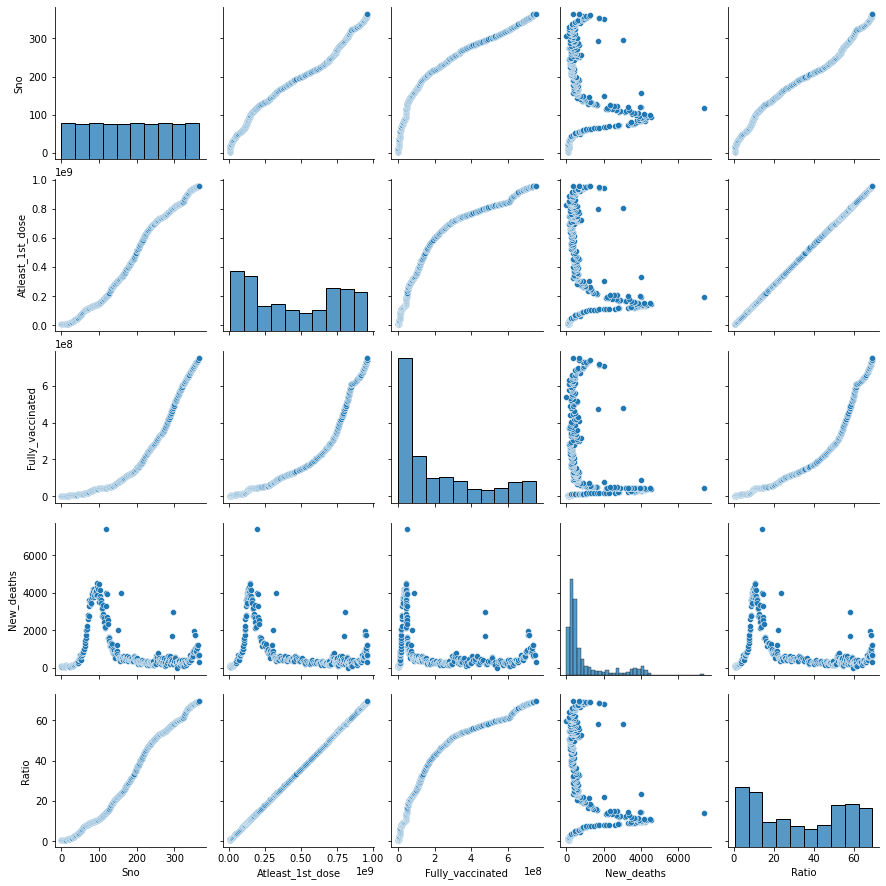

In [124]:
sns.pairplot(df)

In [167]:
df.hvplot.scatter(x='Ratio', y='New_deaths')

:Scatter   [Ratio]   (New_deaths)

In [127]:
df.hvplot.scatter(x='Fully_vaccinated', y='New_deaths')

:Scatter   [Fully_vaccinated]   (New_deaths)

In [128]:
df.hvplot.scatter(x='Fully_vaccinated', y='Ratio')

:Scatter   [Fully_vaccinated]   (Ratio)

In [129]:
df.hvplot.scatter(x='Atleast_1st_dose', y='Fully_vaccinated')

:Scatter   [Atleast_1st_dose]   (Fully_vaccinated)

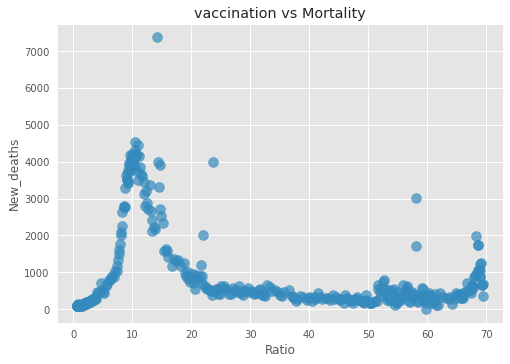

In [130]:
with plt.style.context(("seaborn", "ggplot")):
    df.plot(
                 x="Ratio",
                 y="New_deaths",
                 kind="scatter",
                 s=100, alpha=0.7,
                 title="vaccination vs Mortality")

In [131]:
df.hvplot(
                y = ["Atleast_1st_dose", "Fully_vaccinated"],
                width=700, height=400,
                title="Line Chart of All samples of  vaccination")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [132]:
df.hvplot(x="Date",y="New_deaths",ylim=(0,3500))

:Curve   [Date]   (New_deaths)

In [133]:
df = df.drop("Sno", axis=1)
df

,Country,Date,Atleast_1st_dose,Fully_vaccinated,New_deaths,Ratio
0,India,2021-02-13,8044786,7668,92,0.6
1,India,2021-02-14,8231720,52893,90,0.6
2,India,2021-02-15,8418653,98118,81,0.6
3,India,2021-02-16,8641002,216339,100,0.6
4,India,2021-02-17,8844641,342116,101,0.6
...,...,...,...,...,...,...
360,India,2022-02-09,954257234,740575198,1241,69.1
361,India,2022-02-10,954313669,740861221,657,69.2
362,India,2022-02-11,956363985,740888827,670,69.3
363,India,2022-02-12,957047881,750185166,684,69.4


<AxesSubplot:>

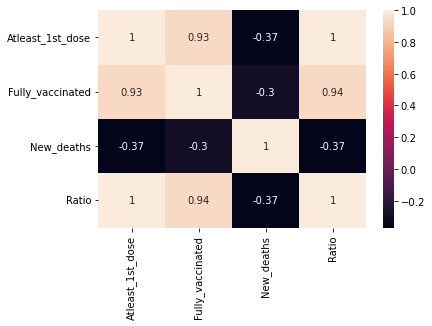

In [134]:
sns.heatmap(df.corr(), annot=True)

**Splitting into training and testing dataset**

In [135]:
#By taking 3 independent attributes
X=df[['Atleast_1st_dose','Fully_vaccinated','Ratio']]
y=df['New_deaths']

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
#defining a function for Regression metrics

from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [138]:
#Scaling or standardizing the attribute values

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_train
X_test = pipeline.transform(X_test)
X_test

array([[ 0.05037859, -0.36533006,  0.04089947],
       [-1.36611731, -0.95192089, -1.36410667],
       [-1.43302763, -0.97213526, -1.42695039],
       [ 1.22429704,  1.51553527,  1.23044141],
       [-1.17378151, -0.92458572, -1.17108666],
       [-0.07787153, -0.43073552, -0.08658351],
       [-1.06393005, -0.86254673, -1.05886572],
       [-0.8224476 , -0.7722472 , -0.81646849],
       [-0.44382764, -0.62397571, -0.4488327 ],
       [-0.75145133, -0.75917602, -0.75362477],
       [ 1.49526552,  2.00424032,  1.49977166],
       [-1.32573829, -0.94563724, -1.32370713],
       [ 1.20259884,  1.42001143,  1.20799722],
       [-1.19271414, -0.92744213, -1.18904201],
       [-0.58916953, -0.72138544, -0.59292438],
       [ 1.17932896,  1.33913641,  1.18555303],
       [-1.44538255, -0.98323935, -1.44041691],
       [ 0.98642702,  0.72930939,  0.99253302],
       [ 1.40955545,  1.88059453,  1.41448375],
       [-0.97246368, -0.79282427, -0.96908897],
       [-1.43802294, -0.97821512, -1.435

**Linear Regression**

In [139]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [140]:
# print the intercept
print(lin_reg.intercept_)

948.4078431372428


In [141]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Atleast_1st_dose,-41025.880193
Fully_vaccinated,-203.173043
Ratio,40741.230471


In [142]:
pred = lin_reg.predict(X_test)
pred

array([ 622.10188285, 1612.59336216, 1801.42455432,  542.32540973,
       1580.16685324,  703.15089193, 1632.82867334, 1583.01340153,
        997.6060339 , 1228.00369915,  299.15899712, 1600.65884446,
        537.51706967, 1625.95211695, 1109.70354261,  594.21217718,
       1761.90986044,  768.21174948,  365.87716516, 1523.78980071,
       1641.83528149, 1370.0333457 , 1637.30870011,  912.82566829,
        777.33075006,  576.56696463,  224.40334381,  624.93512977,
        256.56126063,  324.89223877, 1671.03091945, 1573.04901046,
       1634.96668212,  345.06060442,  559.15854473, 1460.52875395,
       1609.05387306, 1630.91849005,  396.83489436,  351.28660973,
          5.04752689,  341.69927557, 1778.04801767,  533.33704257,
       1634.25118195,   78.06300896, 1517.60526836, 1574.92918268,
       1766.07012344, 1660.71848595,   82.80346113,  272.95886702,
        753.38051805,  769.47735229,  783.70065487,  301.40276912,
       1634.7374468 , 1682.19602856,  181.53300112, 1688.10898

In [143]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [144]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [145]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Test set evaluation:
_____________________________________
MAE: 774.1088279553996
MSE: 1151305.845693606
RMSE: 1072.9892104273956
R2 Square 0.18099270526814015
__________________________________
Train set evaluation:
_____________________________________
MAE: 744.5613206663278
MSE: 1192448.9460500611
RMSE: 1091.9931071440246
R2 Square 0.19412227369965307
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,774.108828,1.151306e+06,1072.98921,0.180993,-535.457944


**Ridge Regression**

In [146]:
from sklearn.linear_model import Ridge

model= Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 829.4390001773248
MSE: 1269396.4740137458
RMSE: 1126.674963782255
R2 Square 0.09698628213094496
__________________________________
Train set evaluation:
_____________________________________
MAE: 782.0335542708734
MSE: 1263963.686466236
RMSE: 1124.2613959690318
R2 Square 0.14579136897249423
__________________________________


**Lasso Regression**

In [147]:
from sklearn.linear_model import Lasso

model= Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 879.3523707664885
MSE: 1414032.7599902137
RMSE: 1189.131094535087
R2 Square -0.005903991327438574
__________________________________
Train set evaluation:
_____________________________________
MAE: 870.6472895040368
MSE: 1479689.668958093
RMSE: 1216.4249541003724
R2 Square 0.0
__________________________________


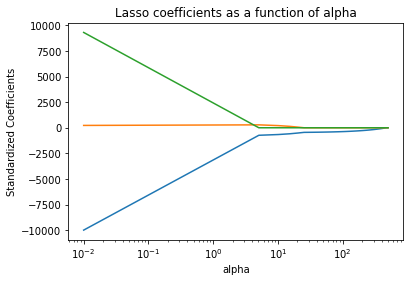

In [148]:
#Graph using alpha
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

**Polynomial Regression**

In [149]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 555.3163401045124
MSE: 674523.4600356948
RMSE: 821.293772066789
R2 Square 0.5201625733914431
__________________________________
Train set evaluation:
_____________________________________
MAE: 529.1111582190485
MSE: 549428.165094974
RMSE: 741.2342174339863
R2 Square 0.6286868952178009
__________________________________


In [150]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 798.1996646229696
MSE: 1251616.2872096635
RMSE: 1118.7565808564718
R2 Square 0.10963461771328153
__________________________________
Train set evaluation:
_____________________________________
MAE: 745.0024114833249
MSE: 1238313.2048070445
RMSE: 1112.7952214163415
R2 Square 0.16312641036482411
__________________________________


**Robust Regression**

In [151]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 800.5918933229906
MSE: 1949127.1652861952
RMSE: 1396.1114444363657
R2 Square -0.386555425476627
__________________________________
Train set evaluation:
_____________________________________
MAE: 718.631191740586
MSE: 1902918.681466
RMSE: 1379.4631859770668
R2 Square -0.28602552372073986
__________________________________


In [152]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,774.108828,1.151306e+06,1072.989210,0.180993,-535.457944
1,Ridge Regression,829.439000,1.269396e+06,1126.674964,0.096986,-536.740314
2,Lasso Regression,879.352371,1.414033e+06,1189.131095,-0.005904,-553.233656
3,Polynomial Regression,555.316340,6.745235e+05,821.293772,0.520163,0.000000
4,Elastic Net Regression,798.199665,1.251616e+06,1118.756581,0.109635,-553.434276
5,Robust Regression,800.591893,1.949127e+06,1396.111444,-0.386555,-25.884588


<AxesSubplot:title={'center':'R2 Square'}, xlabel='Model'>

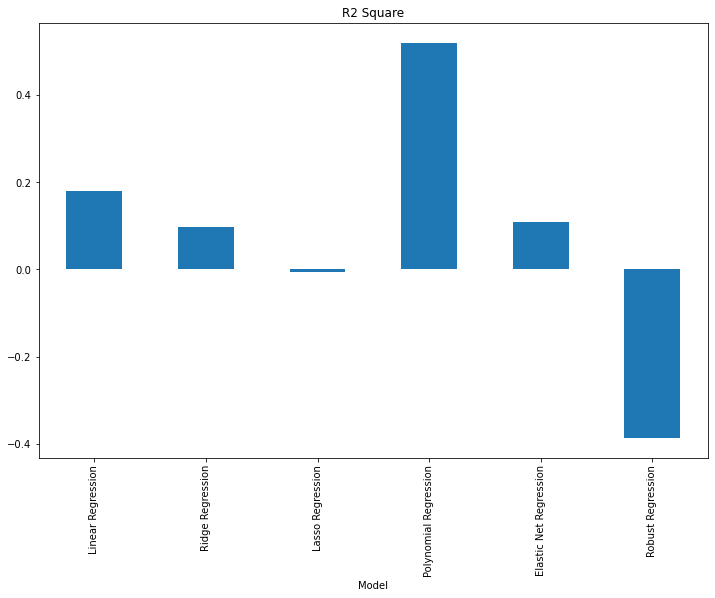

In [153]:
#Comparing models using the metric R2 square
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='bar', figsize=(12, 8),title='R2 Square')

In [109]:
a=results_df['R2 Square']
a

Model
Linear Regression         0.180993
Ridge Regression          0.096986
Lasso Regression         -0.005904
Polynomial Regression     0.520163
Elastic Net Regression    0.109635
Robust Regression        -0.095856
Name: R2 Square, dtype: float64

<AxesSubplot:xlabel='Model'>

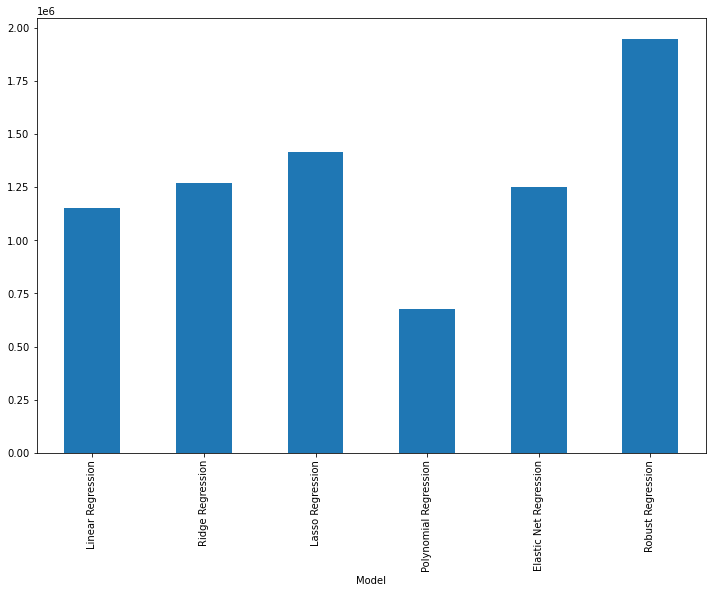

In [154]:
results_df['MSE'].plot(kind='bar', figsize=(12, 8))

<AxesSubplot:xlabel='Model'>

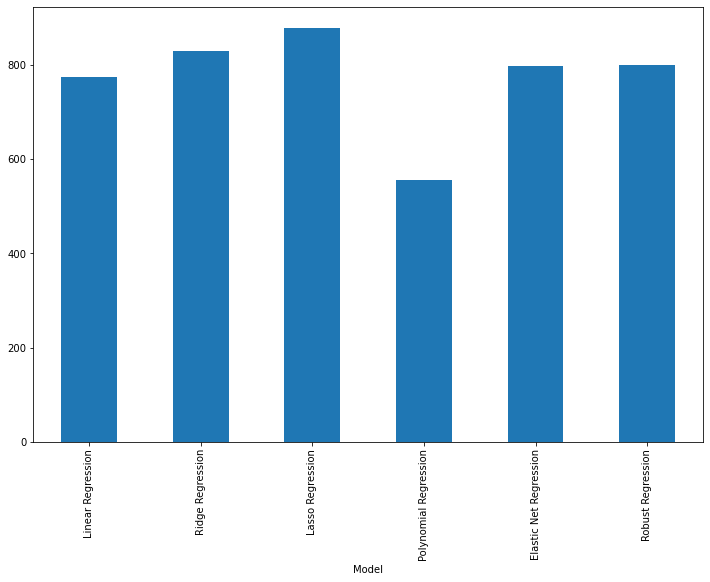

In [155]:
results_df['MAE'].plot(kind='bar', figsize=(12, 8))

<AxesSubplot:xlabel='Model'>

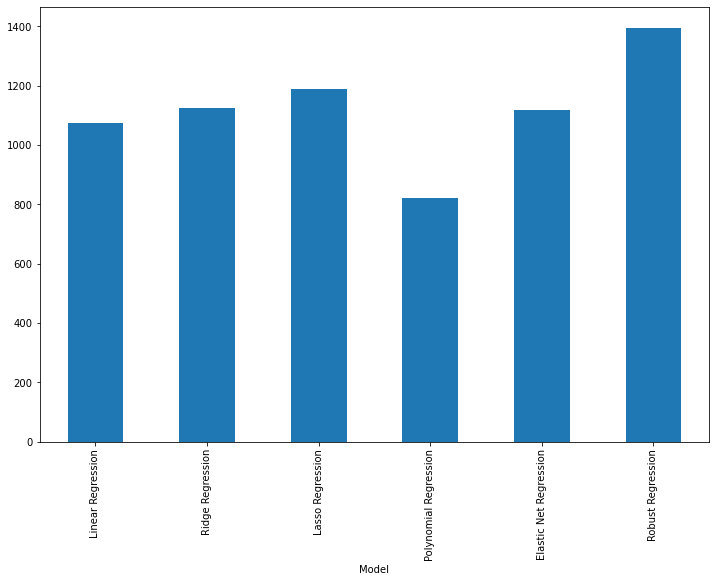

In [156]:
results_df['RMSE'].plot(kind='bar', figsize=(12, 8))

**Linear and polynomial regression using only one independent attribute**

In [157]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
import pylab as pl

In [158]:
mydf = df[df.Country == "India"]

**Linear regression**

Coefficients: -19.39189660867357
Intercept: 1610.7372388366061


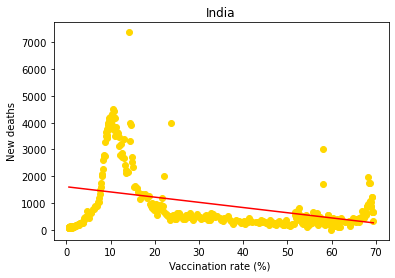

In [159]:
regr = linear_model.LinearRegression()
# We define training variables via Numpy in arrays .
train_x = np.asanyarray(mydf[['Ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])



# Using fit(x, y) method of Scikit-Learn object, we fit the model on the training variables.
regr.fit (train_x, train_y)
# The coefficients and Intercept of this Simple Linear Regression
print(f'Coefficients: {regr.coef_[0][0]}')
print(f'Intercept: {regr.intercept_[0]}')
# Now it is time to draw the line we want using Coefficients and Intercept. 
plt.scatter(mydf.Ratio, mydf.New_deaths,  color='gold') 
XX = train_x
YY = regr.intercept_[0] + regr.coef_[0][0]*train_x   # y = Intercept + (Coeff * VaccinationRate)
# Plotting Regression Line
plt.plot(XX, YY, color='red')
plt.title("India")
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

In [160]:
# Calculate Predicted values by this model
test_x = np.asanyarray(mydf[['Ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
predict_y = regr.predict(train_x)
# Using Predicted values to mesure Error of this model
# Mean absolute error
MAE = np.mean(np.absolute(predict_y  - test_y))  
print(f"Mean absolute error: {MAE:.2f}")
# Mean squared error
MSE =  np.mean((predict_y  - test_y) ** 2)
print(f"Residual sum of squares (MSE): {MSE:.2f}")
# R2-score
r2 = r2_score(test_y , predict_y)
print(f"R2-score: {r2:.2f}")

Mean absolute error: 801.90
Residual sum of squares (MSE): 1260545.29
R2-score: 0.14


**Function for polynomial regression with different degress**

In [161]:
def plot_vaccine_mortality(country_name, df, degree=2):
    
    print(f"{country_name:-^80}")
    # Store country data in a variable 
    mydf = df[df.Country == country_name]
    # Divide data randomly into two test and training sections 
    msk = np.random.rand(len(mydf)) < .8
    train = mydf[msk]
    test = mydf[~msk]
    # Identify the dependent(y) and independent variables(x) in the train dataframe
    train_x = np.asanyarray(train[['Ratio']])
    train_y = np.asanyarray(train[['New_deaths']])
    # Identify the dependent(y) and non-dependent(x) variables in the test dataframe
    test_x = np.asanyarray(train[['Ratio']])
    test_y = np.asanyarray(train[['New_deaths']])
    # Generate polynomial and interaction features Object with our desired degree  
    poly = PolynomialFeatures(degree=degree)
    # In this section, we make a number of variables with different degrees from 
    # independent variables(x) to use them in a multiple regression model.
    train_x_poly = poly.fit_transform(train_x)
    
    
     # Make the model 
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)
    # Print The coefficients
    print ('Coefficients: ')
    for i, c in enumerate(clf.coef_[0]):
        if i: print(f"{c:->22.10f} * X^{i}")
    # Print The Intercept    
    print ('Intercept: ',clf.intercept_[0])
    # Constructing a scatterplot using train data with random color
    plt.scatter(train.Ratio, train.New_deaths,  color= np.random.rand(3,))
    # Set the X axis using numpy:   np.arange(start, end, interval)
    XX = np.arange(train_x[0], train_x[-1], 0.1)
    
    # Set the Y axis using intercept and coefficients that we found in previous steps
    YY = clf.intercept_[0] 
    for d in range(1,degree+1):
        YY += clf.coef_[0][d]*np.power(XX, d)
    # On the previous scatterplot, we fit the regression model with red color. 
    plt.plot(XX, YY, '-r' )
    plt.title(country_name)
    plt.xlabel("Vaccination rate (%) ")
    plt.ylabel("New deaths")
    plt.show()
    # Now it's time to evaluate the model we build 
    # Calculate Predicted values by this model
    test_x_poly = poly.fit_transform(test_x)
    predict_y = clf.predict(test_x_poly)
    # Using Predicted values to mesure Error of this model
    # Mean absolute error
    MAE = np.mean(np.absolute(predict_y - test_y))  
    print(f"Mean absolute error: {MAE:.2f}")
    # Mean squared error
    MSE =  np.mean((predict_y - test_y) ** 2)
    print(f"Residual sum of squares (MSE): {MSE:.2f}")
    
    # R2-score
    r2 = r2_score(test_y, predict_y)
    print(f"R2-score: {r2:.2f}")
    #---------------------------
    print("-"*80)

-------------------------------------India--------------------------------------
Coefficients: 
---------16.5975506501 * X^1
----------0.0565131430 * X^2
Intercept:  1657.3961418410274


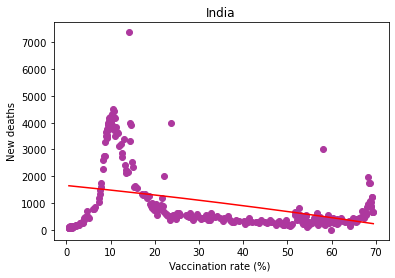

Mean absolute error: 857.41
Residual sum of squares (MSE): 1372602.28
R2-score: 0.14
--------------------------------------------------------------------------------


In [162]:
#Degree 2
plot_vaccine_mortality("India", df, 2)

-------------------------------------India--------------------------------------
Coefficients: 
--------601.3399316827 * X^1
---------36.2094490401 * X^2
----------0.7184732652 * X^3
----------0.0045944566 * X^4
Intercept:  -566.0480167746349


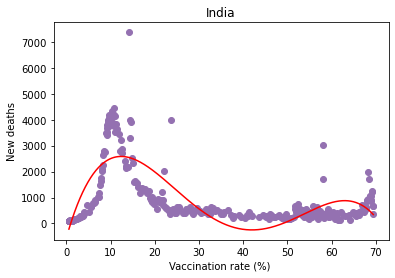

Mean absolute error: 577.45
Residual sum of squares (MSE): 596763.25
R2-score: 0.59
--------------------------------------------------------------------------------


In [163]:
plot_vaccine_mortality("India", df, 4)

-------------------------------------India--------------------------------------
Coefficients: 
--------843.9128864995 * X^1
---------53.9436561309 * X^2
----------0.8823511968 * X^3
----------0.0104085933 * X^4
----------0.0003940853 * X^5
----------0.0000027010 * X^6
Intercept:  -1221.9541639681925


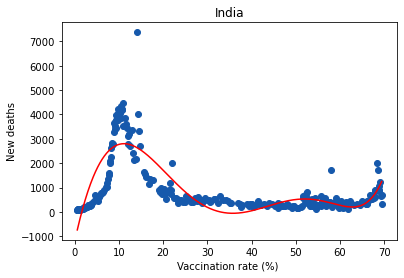

Mean absolute error: 469.84
Residual sum of squares (MSE): 462605.15
R2-score: 0.68
--------------------------------------------------------------------------------


In [164]:
plot_vaccine_mortality("India", df, 6)

**Simple Linear Regression for prediction**

In [165]:
# define x,y
x = df[['Ratio']]
y = df[['New_deaths']]

# split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Standard Normalization(x)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.fit_transform(x_test)

# Standard Normalization(y)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)
y_test = std_y.fit_transform(y_test)

# fitting in
liner = LinearRegression()
liner.fit(x_train,y_train)

# coefficients
print ('Coefficients: ', liner.coef_)
print ('Intercept: ',liner.intercept_)

# prediction
y_pre = std_y.inverse_transform(liner.predict(x_test))# inverse to original value
print('The prediction of New Deaths is :\n',y_pre)

Coefficients:  [[-0.36474821]]
Intercept:  [-9.00677111e-17]
The prediction of New Deaths is :
 [[1079.48485956]
 [1651.5868196 ]
 [1677.17604465]
 [ 595.11738541]
 [1572.99134266]
 [1131.39443038]
 [1527.29629793]
 [1428.59500131]
 [1278.89803477]
 [1403.00577626]
 [ 485.44927805]
 [1635.1366035 ]
 [ 604.25639436]
 [1580.30254982]
 [1337.57047221]
 [ 613.3954033 ]
 [1682.65945002]
 [ 691.99088024]
 [ 520.17751205]
 [1490.74026215]
 [1680.83164823]
 [1226.44012342]
 [1534.60750509]
 [ 741.34152855]
 [ 759.61954644]
 [1059.37903988]
 [ 886.10343026]
 [ 638.98462835]
 [ 450.72104406]
 [ 428.78742259]
 [1666.20923392]
 [1468.80664068]
 [1625.99759455]
 [ 441.58203511]
 [1053.34729398]
 [1448.70082099]
 [1552.88552298]
 [1671.69263928]
 [ 463.51565658]
 [ 507.38289953]
 [ 785.75711203]
 [ 458.03225122]
 [1657.07022497]
 [ 624.36221404]
 [1465.1510371 ]
 [ 816.09862173]
 [1509.01828004]
 [1576.64694624]
 [1680.83164823]
 [1622.34199097]
 [ 819.93700549]
 [ 456.20444943]
 [ 666.40165519]
 [ 

Text(0.5, 1.0, 'Simple Linear Regression')

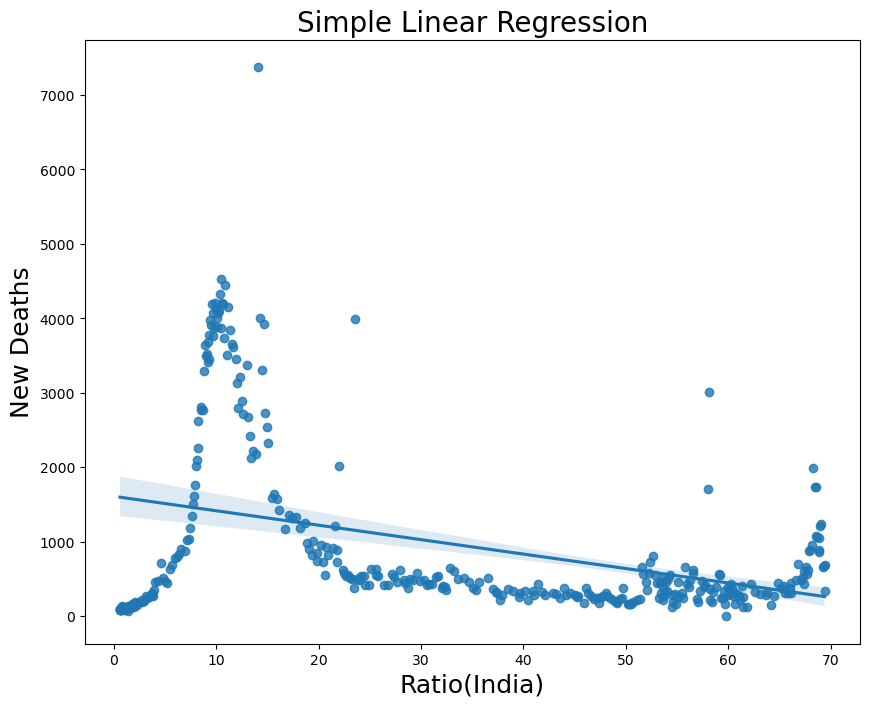

In [166]:
x = df['Ratio']
y = df['New_deaths']

plt.figure(figsize=(10,8),dpi=100)
sns.regplot(x=x, y=y)
plt.xlabel('Ratio(India)',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Simple Linear Regression',fontsize=20)